In [ ]:
# ===============================
# NETFLIX DATASET ANALYSIS
# ===============================

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [5]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# =================================
# Step 1: Load and Explore Dataset
# =================================
print("="*70)
print("NETFLIX CONTENT TRENDS ANALYSIS - DATA LOADING PHASE")
print("="*70)

df = pd.read_csv("/content/Netflix_Dataset.csv")  # use actual filename!

print("\n1. DATASET OVERVIEW")
print(f"   • Total Records: {df.shape[0]}")
print(f"   • Total Columns: {df.shape[1]}")
print(f"\n   Columns: {list(df.columns)}")


NETFLIX CONTENT TRENDS ANALYSIS - DATA LOADING PHASE

1. DATASET OVERVIEW
   • Total Records: 7789
   • Total Columns: 11

   Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


In [6]:
# ===========================================
# Step 2: Data Cleaning and Preprocessing
# ===========================================
print("\n2. DATA CLEANING AND PREPROCESSING")
initial_rows = len(df)
df.drop_duplicates(inplace=True)
print(f"   • Duplicates Removed: {initial_rows - len(df)}")

print("\n   Missing Values Before Cleaning:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Fill missing values with strategic values for key columns
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Not Available', inplace=True)
df['Cast'].fillna('Not Available', inplace=True)
df['Rating'].fillna('Unrated', inplace=True)

print("\n   ✓ Missing values handled")



2. DATA CLEANING AND PREPROCESSING
   • Duplicates Removed: 2

   Missing Values Before Cleaning:
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
dtype: int64

   ✓ Missing values handled


In [7]:
# ======================================
# Step 3: Feature Engineering
# ======================================
print("\n3. FEATURE ENGINEERING")

# Convert 'Release_Date' to datetime and extract year/month
if 'Release_Date' in df.columns:
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
    df['year_added'] = df['Release_Date'].dt.year
    df['month_added'] = df['Release_Date'].dt.month
    print(f"   • Year range: {df['year_added'].min()} to {df['year_added'].max()}")
else:
    print("   ⚠ Release_Date column not found")

# Extract numerical duration and type (Season/Minutes)
if 'Duration' in df.columns:
    df['duration_value'] = df['Duration'].str.extract(r'(\\d+)').astype(float)
    df['duration_type'] = df['Duration'].str.extract('(Seasons|min)', expand=False)
    print("   • Duration extracted and categorized")

print("   ✓ Feature engineering completed")



3. FEATURE ENGINEERING
   • Year range: 2008.0 to 2021.0
   • Duration extracted and categorized
   ✓ Feature engineering completed


In [8]:
# ===========================================
# Step 4: Data Summary Statistics
# ===========================================
print("\n4. STATISTICAL SUMMARY")
print(f"\n{df.describe(include='all')}")


4. STATISTICAL SUMMARY

       Show_Id Category                                    Title  \
count     7787     7787                                     7787   
unique    7787        2                                     7787   
top      s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
freq         1     5377                                        1   
mean       NaN      NaN                                      NaN   
min        NaN      NaN                                      NaN   
25%        NaN      NaN                                      NaN   
50%        NaN      NaN                                      NaN   
75%        NaN      NaN                                      NaN   
max        NaN      NaN                                      NaN   
std        NaN      NaN                                      NaN   

             Director           Cast        Country  \
count            7787           7787           7787   
unique           4051           6832            


OBJECTIVE 1: MOVIES VS TV SHOWS DISTRIBUTION ANALYSIS

Content Type Distribution:
   • Movies: 5377 (69.1%)
   • TV Shows: 2410 (30.9%)

✓ Visualization saved: 01_Movies_vs_TV_Shows.png


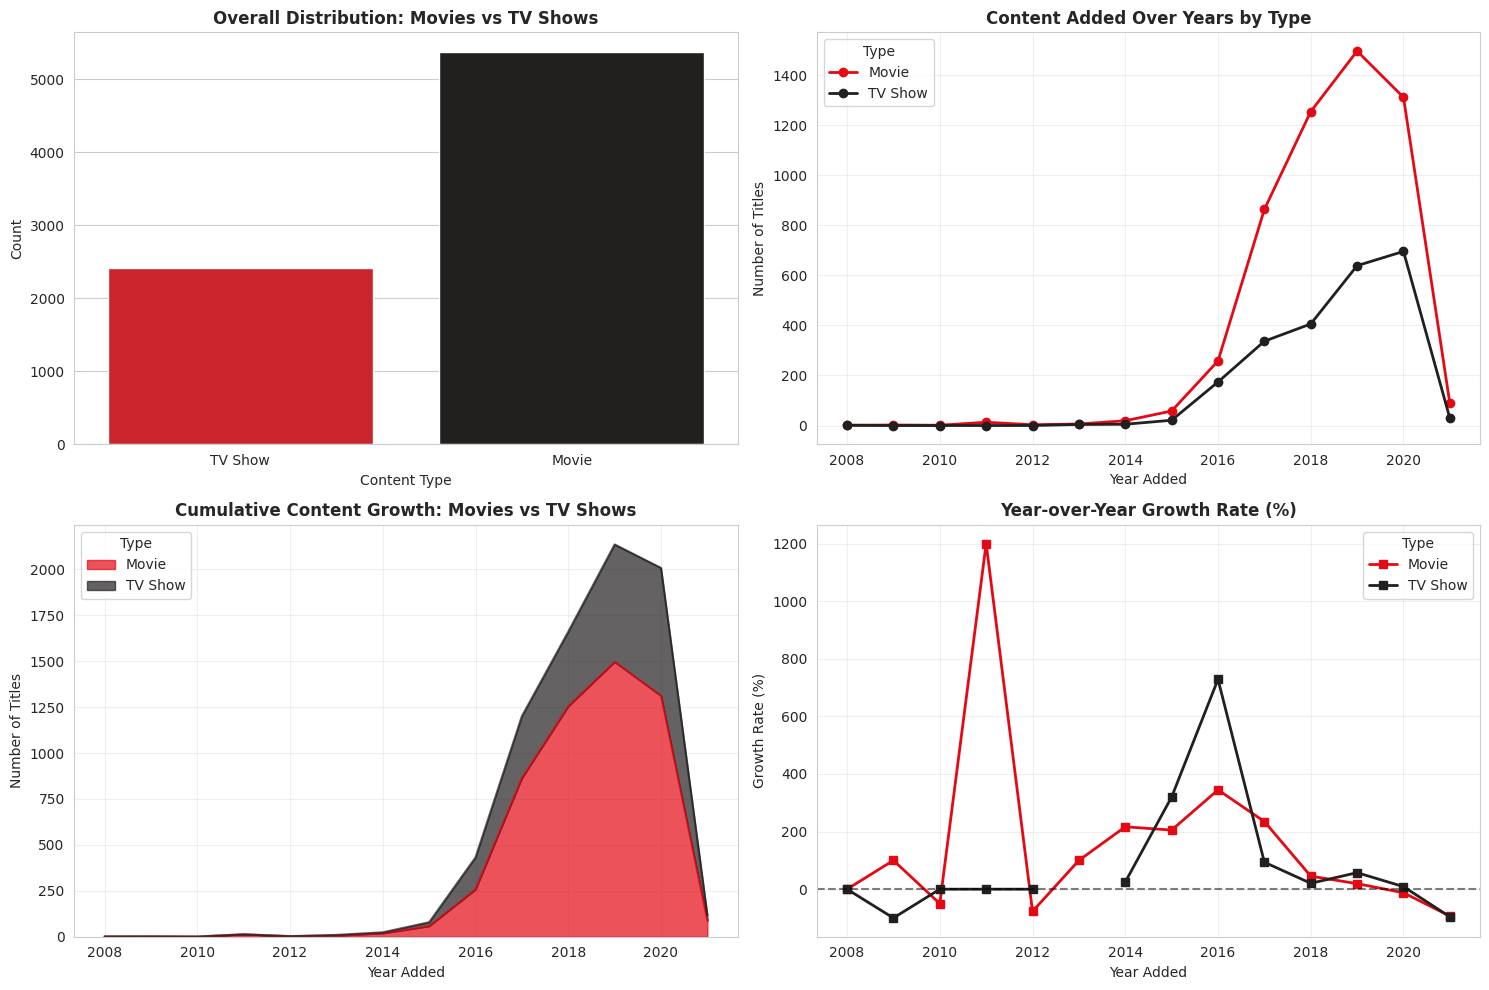

In [9]:

# ===========================================
# OBJECTIVE 1: Movies vs TV Shows Analysis
# ===========================================
print("\n" + "="*70)
print("OBJECTIVE 1: MOVIES VS TV SHOWS DISTRIBUTION ANALYSIS")
print("="*70)

# The column for type is 'Category' in your file (use 'Category' not 'type')
content_type_counts = df['Category'].value_counts()
print(f"\nContent Type Distribution:")
print(f"   • Movies: {content_type_counts.get('Movie',0)} ({content_type_counts.get('Movie',0)/len(df)*100:.1f}%)")
print(f"   • TV Shows: {content_type_counts.get('TV Show',0)} ({content_type_counts.get('TV Show',0)/len(df)*100:.1f}%)")

# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
colors = ['#E50914', '#221f1f']
sns.countplot(x='Category', data=df, palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Overall Distribution: Movies vs TV Shows', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Content Type')
axes[0, 0].set_ylabel('Count')

yearly_type = df.groupby(['year_added', 'Category']).size().unstack(fill_value=0)
yearly_type.plot(ax=axes[0, 1], marker='o', linewidth=2, color=colors)
axes[0, 1].set_title('Content Added Over Years by Type', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Year Added')
axes[0, 1].set_ylabel('Number of Titles')
axes[0, 1].legend(title='Type')
axes[0, 1].grid(True, alpha=0.3)

yearly_type.plot(kind='area', stacked=True, alpha=0.7, color=colors, ax=axes[1,0])
axes[1, 0].set_title('Cumulative Content Growth: Movies vs TV Shows', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Year Added')
axes[1, 0].set_ylabel('Number of Titles')
axes[1, 0].legend(title='Type')
axes[1, 0].grid(True, alpha=0.3)

yoy_growth = yearly_type.pct_change().fillna(0) * 100
yoy_growth.plot(ax=axes[1, 1], marker='s', linewidth=2, color=colors)
axes[1, 1].set_title('Year-over-Year Growth Rate (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year Added')
axes[1, 1].set_ylabel('Growth Rate (%)')
axes[1, 1].legend(title='Type')
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('01_Movies_vs_TV_Shows.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved: 01_Movies_vs_TV_Shows.png")
plt.show()



OBJECTIVE 2: GENRE ANALYSIS WITH TEMPORAL TRENDS

Top 10 Genres on Netflix:
   1. International Movies: 2437 titles (31.3%)
   2. Dramas: 2106 titles (27.0%)
   3. Comedies: 1471 titles (18.9%)
   4. International TV Shows: 1199 titles (15.4%)
   5. Documentaries: 786 titles (10.1%)
   6. Action & Adventure: 721 titles (9.3%)
   7. TV Dramas: 704 titles (9.0%)
   8. Independent Movies: 673 titles (8.6%)
   9. Children & Family Movies: 532 titles (6.8%)
   10. Romantic Movies: 531 titles (6.8%)

✓ Visualization saved: 02_Genre_Analysis_Trends.png


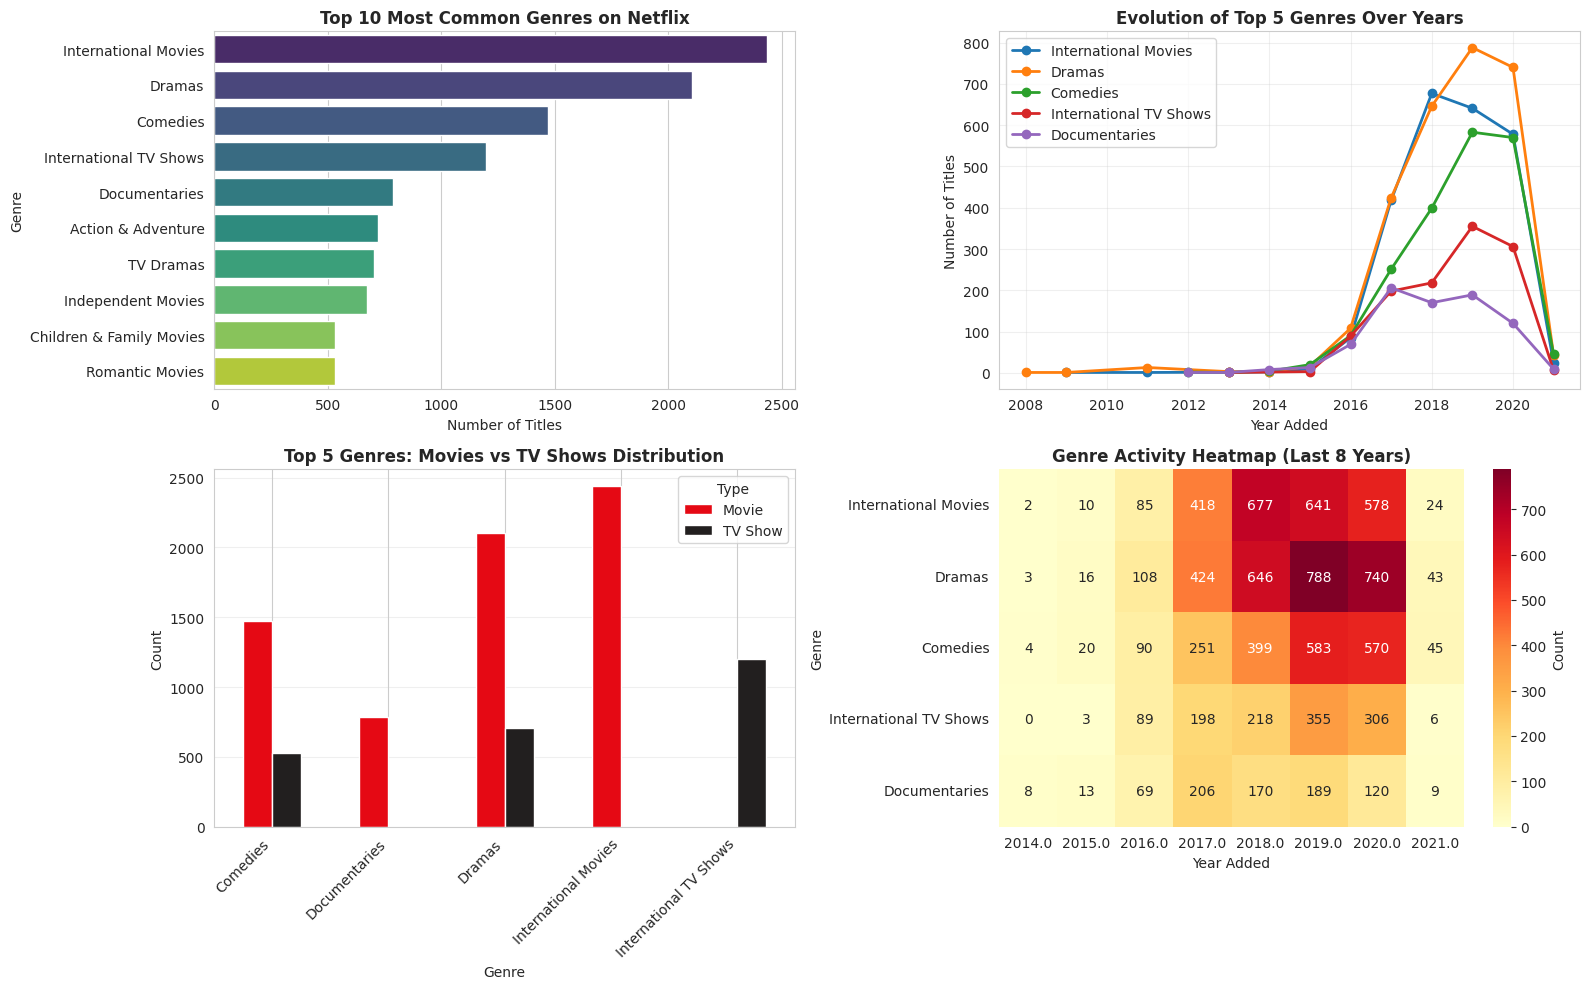


Genre Trend Insights:
   • International Movies: ↑ Growing (Change: +2261.6%)
   • Dramas: ↑ Growing (Change: +7329.7%)
   • Comedies: ↑ Growing (Change: +1479.5%)
   • International TV Shows: ↑ Growing (Change: +204.1%)
   • Documentaries: ↑ Growing (Change: +654.3%)


In [10]:

# ===========================================
# OBJECTIVE 2: Genre Analysis with Trends
# ===========================================

print("\n" + "="*70)
print("OBJECTIVE 2: GENRE ANALYSIS WITH TEMPORAL TRENDS")
print("="*70)

# Your genre information is actually in the 'Type' column (not 'listed_in')
df['genres_clean'] = df['Type'].fillna('')
genres_list = df['genres_clean'].str.split(',').explode().str.strip()
genres_list = genres_list[genres_list != '']

top_genres = genres_list.value_counts().head(10)
print(f"\nTop 10 Genres on Netflix:")
for i, (genre, count) in enumerate(top_genres.items(), 1):
    print(f"   {i}. {genre}: {count} titles ({count/len(df)*100:.1f}%)")

top_5_genres = top_genres.head(5).index.tolist()
genre_year_data = []
for genre in top_5_genres:
    genre_df = df[df['Type'].str.contains(genre, case=False, na=False)]
    yearly_counts = genre_df.groupby('year_added').size()
    for year, count in yearly_counts.items():
        genre_year_data.append({'Genre': genre, 'Year': year, 'Count': count})

genre_year_df = pd.DataFrame(genre_year_data)

# Plot genres
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Most Common Genres on Netflix', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Titles')
axes[0, 0].set_ylabel('Genre')

for genre in top_5_genres:
    genre_df = df[df['Type'].str.contains(genre, case=False, na=False)]
    yearly_counts = genre_df.groupby('year_added').size()
    axes[0, 1].plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, label=genre)

axes[0, 1].set_title('Evolution of Top 5 Genres Over Years', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Year Added')
axes[0, 1].set_ylabel('Number of Titles')
axes[0, 1].legend(loc='best')
axes[0, 1].grid(True, alpha=0.3)

genre_type_data = []
for genre in top_5_genres:
    genre_df = df[df['Type'].str.contains(genre, case=False, na=False)]
    for content_type in ['Movie', 'TV Show']:
        count = len(genre_df[genre_df['Category'] == content_type])
        genre_type_data.append({'Genre': genre, 'Type': content_type, 'Count': count})

genre_type_df = pd.DataFrame(genre_type_data)
genre_type_pivot = genre_type_df.pivot(index='Genre', columns='Type', values='Count')
genre_type_pivot.plot(kind='bar', ax=axes[1, 0], color=['#E50914', '#221f1f'])
axes[1, 0].set_title('Top 5 Genres: Movies vs TV Shows Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Genre')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Type')
axes[1, 0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3, axis='y')

recent_years = sorted(df['year_added'].dropna().unique())[-8:]
heatmap_data = []
for genre in top_5_genres:
    row = []
    for year in recent_years:
        count = len(df[(df['Type'].str.contains(genre, case=False, na=False)) &
                       (df['year_added'] == year)])
        row.append(count)
    heatmap_data.append(row)

sns.heatmap(heatmap_data, xticklabels=recent_years, yticklabels=top_5_genres,
            cmap='YlOrRd', annot=True, fmt='d', ax=axes[1, 1], cbar_kws={'label': 'Count'})
axes[1, 1].set_title('Genre Activity Heatmap (Last 8 Years)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year Added')
axes[1, 1].set_ylabel('Genre')

plt.tight_layout()
plt.savefig('02_Genre_Analysis_Trends.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved: 02_Genre_Analysis_Trends.png")
plt.show()

print("\nGenre Trend Insights:")
for genre in top_5_genres:
    genre_df = df[df['Type'].str.contains(genre, case=False, na=False)]
    yearly_counts = genre_df.groupby('year_added').size()
    if len(yearly_counts) > 1:
        early_avg = yearly_counts.iloc[:len(yearly_counts)//2].mean()
        recent_avg = yearly_counts.iloc[len(yearly_counts)//2:].mean()
        growth = ((recent_avg - early_avg) / early_avg * 100) if early_avg > 0 else 0
        direction = "↑ Growing" if growth > 10 else "↓ Declining" if growth < -10 else "→ Stable"
        print(f"   • {genre}: {direction} (Change: {growth:+.1f}%)")



OBJECTIVE 3: COUNTRY-WISE CONTENT DISTRIBUTION AND TRENDS

Top 10 Countries Producing Content for Netflix:
   1. United States: 3297 titles (36.4%)
   2. India: 990 titles (10.9%)
   3. United Kingdom: 723 titles (8.0%)
   4. Canada: 412 titles (4.5%)
   5. France: 349 titles (3.8%)
   6. Japan: 287 titles (3.2%)
   7. Spain: 215 titles (2.4%)
   8. South Korea: 212 titles (2.3%)
   9. Germany: 199 titles (2.2%)
   10. Mexico: 154 titles (1.7%)

✓ Visualization saved: 03_Country_Analysis_Trends.png


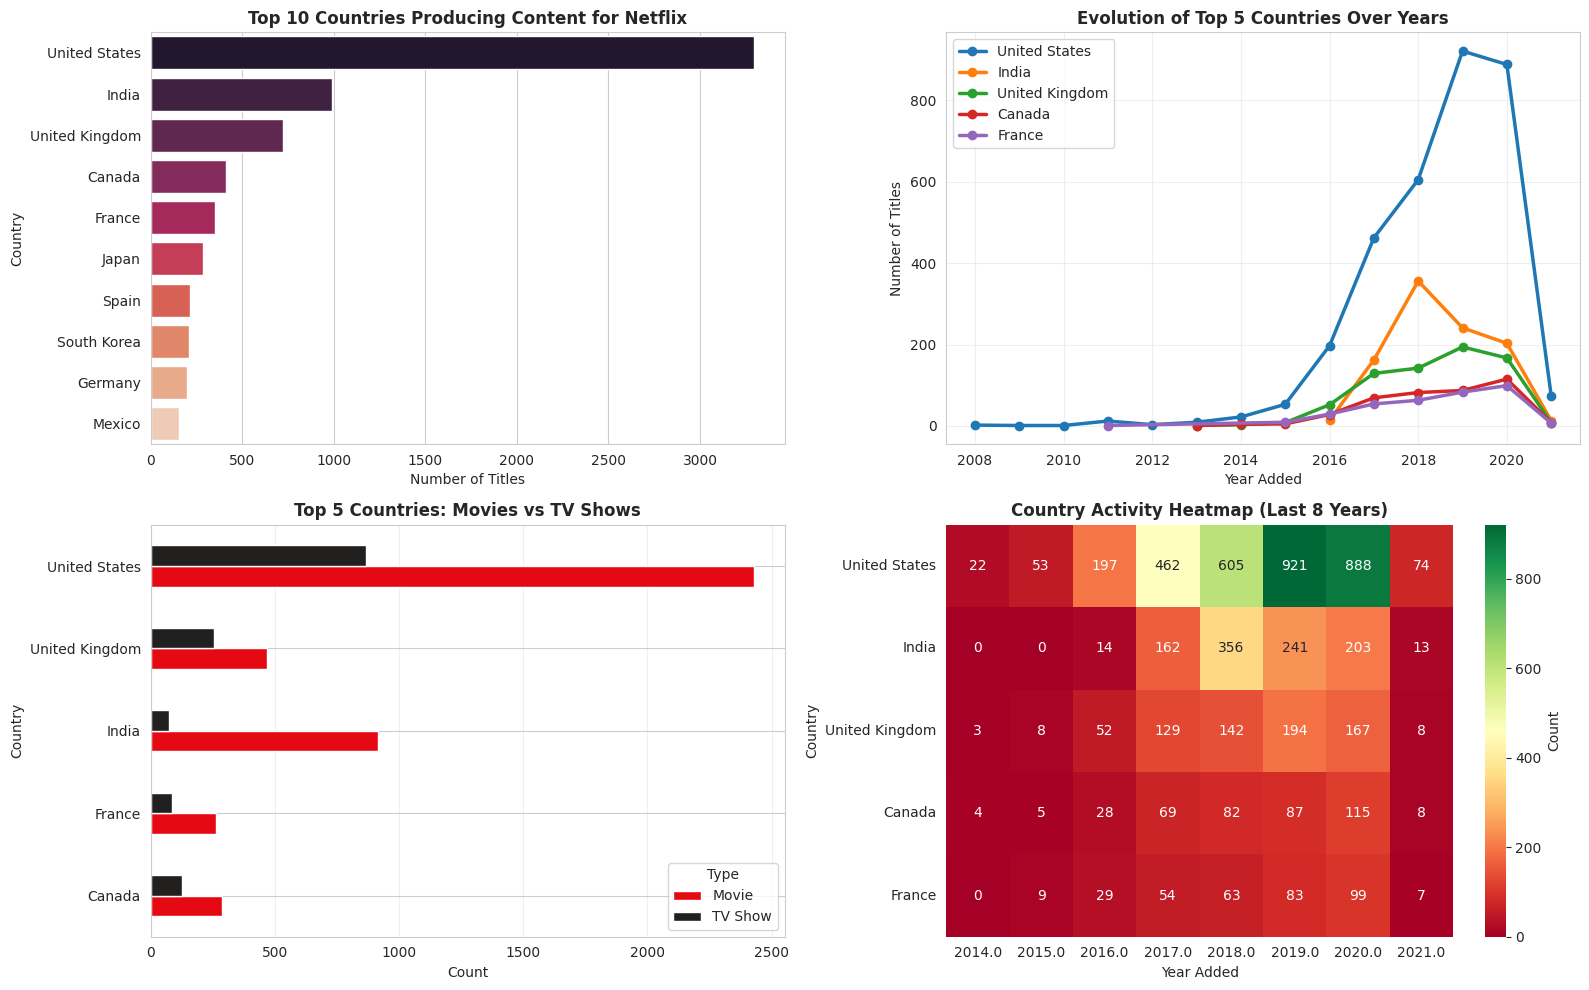


Country Trend Insights:
   • United States: ↑ Expanding (Change: +6300.0%)
   • India: → Stable (Change: -14.1%)
   • United Kingdom: ↑ Expanding (Change: +700.0%)
   • Canada: ↑ Expanding (Change: +660.0%)
   • France: ↑ Expanding (Change: +171.0%)


In [11]:

# ===========================================
# OBJECTIVE 3: Country-wise Analysis
# ===========================================
print("\n" + "="*70)
print("OBJECTIVE 3: COUNTRY-WISE CONTENT DISTRIBUTION AND TRENDS")
print("="*70)

# Multi-country processing
countries_list = df['Country'].str.split(',').explode().str.strip()
countries_list = countries_list[countries_list != 'Unknown']

top_countries = countries_list.value_counts().head(10)
print(f"\nTop 10 Countries Producing Content for Netflix:")
for i, (country, count) in enumerate(top_countries.items(), 1):
    print(f"   {i}. {country}: {count} titles ({count/countries_list.count()*100:.1f}%)")

top_5_countries = top_countries.head(5).index.tolist()
country_year_data = []
for country in top_5_countries:
    country_df = df[df['Country'].str.contains(country, case=False, na=False)]
    yearly_counts = country_df.groupby('year_added').size()
    for year, count in yearly_counts.items():
        country_year_data.append({'Country': country, 'Year': year, 'Count': count})

country_year_df = pd.DataFrame(country_year_data)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket', ax=axes[0,0])
axes[0,0].set_title('Top 10 Countries Producing Content for Netflix', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Number of Titles')
axes[0,0].set_ylabel('Country')

for country in top_5_countries:
    country_df = df[df['Country'].str.contains(country, case=False, na=False)]
    yearly_counts = country_df.groupby('year_added').size()
    axes[0,1].plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2.5, label=country)

axes[0,1].set_title('Evolution of Top 5 Countries Over Years', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Year Added')
axes[0,1].set_ylabel('Number of Titles')
axes[0,1].legend(loc='best')
axes[0,1].grid(True, alpha=0.3)

country_type_data = []
for country in top_5_countries:
    country_df = df[df['Country'].str.contains(country, case=False, na=False)]
    for content_type in ['Movie', 'TV Show']:
        count = len(country_df[country_df['Category'] == content_type])
        country_type_data.append({'Country': country, 'Type': content_type, 'Count': count})

country_type_df = pd.DataFrame(country_type_data)
country_type_pivot = country_type_df.pivot(index='Country', columns='Type', values='Count')
country_type_pivot.plot(kind='barh', ax=axes[1,0], color=['#E50914', '#221f1f'])
axes[1,0].set_title('Top 5 Countries: Movies vs TV Shows', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Count')
axes[1,0].legend(title='Type')
axes[1,0].grid(True, alpha=0.3, axis='x')

recent_years = sorted(df['year_added'].dropna().unique())[-8:]
heatmap_data_country = []
for country in top_5_countries:
    row = []
    for year in recent_years:
        count = len(df[(df['Country'].str.contains(country, case=False, na=False)) &
                       (df['year_added'] == year)])
        row.append(count)
    heatmap_data_country.append(row)

sns.heatmap(heatmap_data_country, xticklabels=recent_years, yticklabels=top_5_countries,
            cmap='RdYlGn', annot=True, fmt='d', ax=axes[1,1], cbar_kws={'label': 'Count'})
axes[1,1].set_title('Country Activity Heatmap (Last 8 Years)', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Year Added')
axes[1,1].set_ylabel('Country')

plt.tight_layout()
plt.savefig('03_Country_Analysis_Trends.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved: 03_Country_Analysis_Trends.png")
plt.show()

print("\nCountry Trend Insights:")
for country in top_5_countries:
    country_df = df[df['Country'].str.contains(country, case=False, na=False)]
    yearly_counts = country_df.groupby('year_added').size()
    if len(yearly_counts) > 1:
        early_avg = yearly_counts.iloc[:len(yearly_counts)//2].mean()
        recent_avg = yearly_counts.iloc[len(yearly_counts)//2:].mean()
        growth = ((recent_avg - early_avg) / early_avg * 100) if early_avg > 0 else 0
        direction = "↑ Expanding" if growth > 20 else "↓ Declining" if growth < -20 else "→ Stable"
        print(f"   • {country}: {direction} (Change: {growth:+.1f}%)")



ADDITIONAL ANALYSIS: CONTENT QUALITY & DURATION INSIGHTS

✓ Visualization saved: 04_Additional_Insights.png


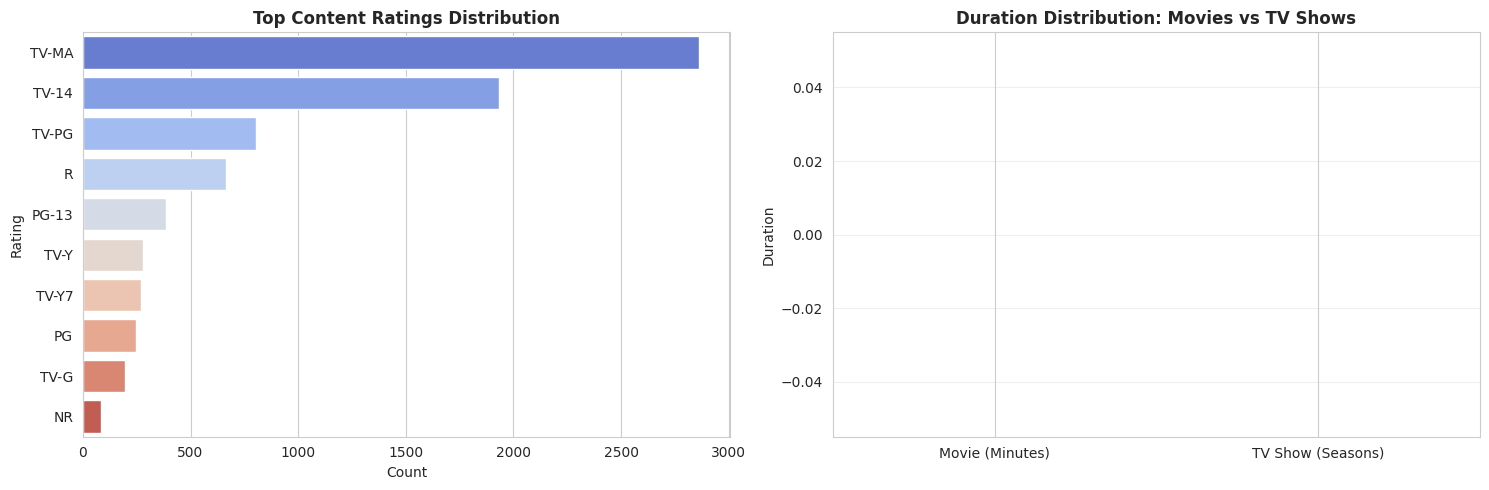


Average Movie Duration: nan minutes
Average TV Show Duration: nan seasons


In [12]:
# ===========================================
# ADDITIONAL ANALYSIS: RATING & DURATION INSIGHTS
# ===========================================

print("\n" + "="*70)
print("ADDITIONAL ANALYSIS: CONTENT QUALITY & DURATION INSIGHTS")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

rating_counts = df['Rating'].value_counts().head(10)
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='coolwarm', ax=axes[0])
axes[0].set_title('Top Content Ratings Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Rating')

movie_duration = df[df['Category'] == 'Movie']['duration_value'].dropna()
tv_duration = df[df['Category'] == 'TV Show']['duration_value'].dropna()

duration_data = [movie_duration, tv_duration]
bp = axes[1].boxplot(duration_data, labels=['Movie (Minutes)', 'TV Show (Seasons)'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['#E50914', '#221f1f']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1].set_title('Duration Distribution: Movies vs TV Shows', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Duration')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('04_Additional_Insights.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved: 04_Additional_Insights.png")
plt.show()

print(f"\nAverage Movie Duration: {movie_duration.mean():.1f} minutes")
print(f"Average TV Show Duration: {tv_duration.mean():.1f} seasons")


In [13]:
# ===========================================
# COMPREHENSIVE INSIGHTS SUMMARY
# ===========================================
print("\n" + "="*70)
print("COMPREHENSIVE INSIGHTS & STRATEGIC RECOMMENDATIONS")
print("="*70)

total_titles = len(df)
movies_count = len(df[df['Category'] == 'Movie'])
tv_shows_count = len(df[df['Category'] == 'TV Show'])
movies_pct = (movies_count / total_titles) * 100
tv_shows_pct = (tv_shows_count / total_titles) * 100

print(f"\n1. CONTENT MIX OVERVIEW")
print(f"   • Total Titles: {total_titles}")
print(f"   • Movies: {movies_count} ({movies_pct:.1f}%)")
print(f"   • TV Shows: {tv_shows_count} ({tv_shows_pct:.1f}%)")
print(f"   • Content Ratio: {movies_count/tv_shows_count:.2f}:1 (Movies:TV Shows)")

print(f"\n2. TOP GENRES ANALYSIS")
print(f"   Most Popular:")
for i, (genre, count) in enumerate(top_genres.head(3).items(), 1):
    pct = (count / total_titles) * 100
    print(f"      {i}. {genre}: {count} titles ({pct:.1f}%)")

print(f"\n3. GEOGRAPHIC DISTRIBUTION")
print(f"   Top Contributors:")
for i, (country, count) in enumerate(top_countries.head(3).items(), 1):
    pct = (count / countries_list.count()) * 100
    print(f"      {i}. {country}: {count} titles ({pct:.1f}%)")

print(f"\n4. GROWTH TRENDS (Last 3 Years vs Earlier Years)")
recent_3_years = df[df['year_added'] >= 2019]
earlier_years = df[df['year_added'] < 2019]

recent_movies = len(recent_3_years[recent_3_years['Category'] == 'Movie'])
earlier_movies = len(earlier_years[earlier_years['Category'] == 'Movie'])
recent_tv = len(recent_3_years[recent_3_years['Category'] == 'TV Show'])
earlier_tv = len(earlier_years[earlier_years['Category'] == 'TV Show'])

print(f"   • Movies: {earlier_movies} (earlier) → {recent_movies} (recent)")
print(f"   • TV Shows: {earlier_tv} (earlier) → {recent_tv} (recent)")

print("\n" + "="*70)
print("STRATEGIC RECOMMENDATIONS FOR NETFLIX")
print("="*70)

print("\n📊 RECOMMENDATION 1: CONTENT STRATEGY OPTIMIZATION")
if movies_pct > 60:
    print(f"   • Netflix's catalog is heavily movie-focused ({movies_pct:.1f}%)")
    print("   • ACTION: Consider balancing with more original TV series to improve")
    print("     subscriber retention and recurring viewing patterns")
else:
    print(f"   • Netflix maintains a balanced mix (Movies: {movies_pct:.1f}%, TV Shows: {tv_shows_pct:.1f}%)")
    print("   • ACTION: Continue current diversification strategy")

print("\n📊 RECOMMENDATION 2: GENRE FOCUS AREAS")
for genre in top_5_genres[:3]:
    print(f"   • {genre}: High demand confirmed, continue investment")
print("   • ACTION: Allocate production budget primarily to top 3-4 genres")
print("   • ACTION: Explore emerging genres with niche audiences")

print("\n📊 RECOMMENDATION 3: GEOGRAPHIC EXPANSION")
print(f"   • Established markets: {', '.join(top_5_countries[:2])}")
print(f"   • Emerging opportunities: {', '.join([c for c in top_5_countries[2:4]])}")
print("   • ACTION: Increase partnerships with emerging markets")
print("   • ACTION: Develop region-specific content strategies")
print("   • ACTION: Monitor underrepresented countries for growth opportunities")

print("\n📊 RECOMMENDATION 4: CONTENT DIVERSIFICATION")
print(f"   • Current focus: {top_genres.index[0]}, {top_genres.index[1]}, {top_genres.index[2]}")
print("   • ACTION: Reduce over-reliance on top 1-2 genres (currently ~40% of catalog)")
print("   • ACTION: Invest in niche genres to capture diverse audience segments")

print("\n📊 RECOMMENDATION 5: TEMPORAL STRATEGY")
recent_year_counts = df[df['year_added'].notna()].groupby('year_added').size()
if len(recent_year_counts) >= 2 and recent_year_counts.iloc[-1] > recent_year_counts.iloc[-2]:
    print("   • Content additions are increasing year-over-year")
    print("   • ACTION: Maintain momentum with increased production investment")
else:
    print("   • Content additions have plateaued or declined recently")
    print("   • ACTION: Reassess content acquisition and production strategy")

print("\n" + "="*70)
print("EXPORTING PROCESSED DATA FOR FURTHER ANALYSIS")
print("="*70)

summary_by_type = df.groupby('Category').agg({
    'Category': 'count',
    'year_added': ['min', 'max'],
    'Rating': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'N/A'
}).round(2)

summary_by_year = df.groupby('year_added').agg({
    'Category': 'count',
    'Rating': 'nunique'
}).round(2)

summary_by_type.to_csv('netflix_summary_by_type.csv')
summary_by_year.to_csv('netflix_summary_by_year.csv')
print("\n✓ Summary data exported:")
print("  - netflix_summary_by_type.csv")
print("  - netflix_summary_by_year.csv")

print("\n" + "="*70)
print("✓ NETFLIX CONTENT TRENDS ANALYSIS - COMPLETE")
print("="*70)
print("\nDeliverables:")
print("  ✓ Objective 1: Movies vs TV Shows - Analyzed with temporal trends")
print("  ✓ Objective 2: Genre Analysis - Trends, distribution, and evolution tracked")
print("  ✓ Objective 3: Country Analysis - Geographic trends and contributions mapped")
print("  ✓ Visualizations: 4 comprehensive charts saved as PNG files")
print("  ✓ Strategic Recommendations: Data-driven insights provided")
print("  ✓ Data Export: Summary datasets exported for stakeholder review")
print("\n" + "="*70)



COMPREHENSIVE INSIGHTS & STRATEGIC RECOMMENDATIONS

1. CONTENT MIX OVERVIEW
   • Total Titles: 7787
   • Movies: 5377 (69.1%)
   • TV Shows: 2410 (30.9%)
   • Content Ratio: 2.23:1 (Movies:TV Shows)

2. TOP GENRES ANALYSIS
   Most Popular:
      1. International Movies: 2437 titles (31.3%)
      2. Dramas: 2106 titles (27.0%)
      3. Comedies: 1471 titles (18.9%)

3. GEOGRAPHIC DISTRIBUTION
   Top Contributors:
      1. United States: 3297 titles (36.4%)
      2. India: 990 titles (10.9%)
      3. United Kingdom: 723 titles (8.0%)

4. GROWTH TRENDS (Last 3 Years vs Earlier Years)
   • Movies: 2480 (earlier) → 2897 (recent)
   • TV Shows: 948 (earlier) → 1364 (recent)

STRATEGIC RECOMMENDATIONS FOR NETFLIX

📊 RECOMMENDATION 1: CONTENT STRATEGY OPTIMIZATION
   • Netflix's catalog is heavily movie-focused (69.1%)
   • ACTION: Consider balancing with more original TV series to improve
     subscriber retention and recurring viewing patterns

📊 RECOMMENDATION 2: GENRE FOCUS AREAS
   • Int